/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4506
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0492
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0115
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0049
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.1894e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.8606e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0440e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3004e-04
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


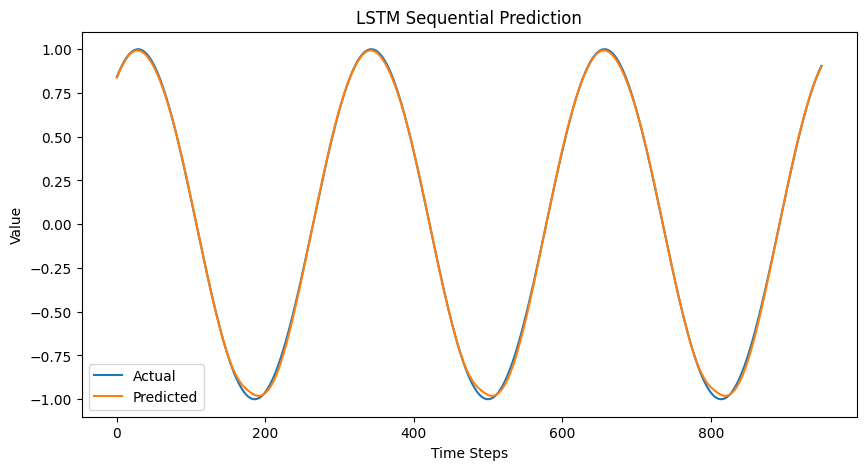

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Generate synthetic sequential data (sine wave)
def generate_sine_wave(seq_length=50, total_points=1000):
    x = np.arange(total_points)
    y = np.sin(0.02 * x)
    return y

# 2. Prepare the dataset
def prepare_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    X = np.array(X)
    y = np.array(y)
    return X, y

# Parameters
seq_length = 50
data = generate_sine_wave()
X, y = prepare_dataset(data, seq_length)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3. Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

# 4. Compile the model
model.compile(optimizer='adam', loss='mse')

# 5. Train the model
model.fit(X, y, epochs=10, batch_size=32)

# 6. Predict and visualize
predicted = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title("LSTM Sequential Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.show()
